In [ ]:
#SVR has a different regression goal compared to Linear regression. 
#In Linear regression we are trying to minimize the error between the prediction and data. 
#In SVR our goal is to make sure that errors do not exceed the threshold

#Note: the SVR doesn't have feature scaling in the algorithm itself unlike linear regression and such more common models

In [79]:
import pandas as pd
data_svr = pd.read_csv('svr_data.csv')
X = data_svr.iloc[:,1:2].values
Y = data_svr.iloc[:,2:3].values



In [80]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()


In [81]:
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

C:\Users\00821554\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00821554\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00821554\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00821554\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [82]:
#build svr 
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #rbf is guassian for non-linear data
regressor.fit(X, Y)

C:\Users\00821554\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
Y.shape

(10,)

In [93]:
import numpy as np
y_pred1 = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]])))) #we have to inverse transform to get the original values
#Note that we have to do Y inverse here since we are finding Y_pred value

In [94]:
y_pred1

array([170370.0204065])

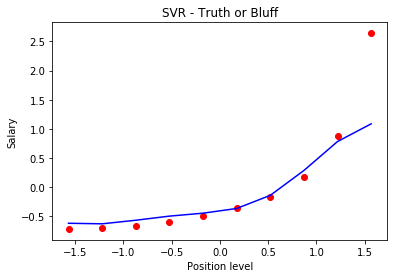

In [83]:
import matplotlib.pyplot as plt
plt.scatter(X,Y, color = 'red')
plt.plot(X, regressor.predict(X), color= 'blue')
plt.title('SVR - Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

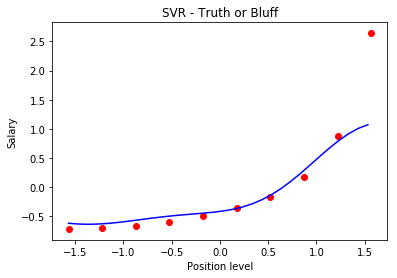

In [96]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color= 'blue')
plt.title('SVR - Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()